#### Stress Detection
*Stress, anxiety or depression are threatening the mental health of people. People often share their feelings on social media platforms like on instagram in the form of post and stories, and on reddit in the form of asking for suggestions about their life. In the past few years, many content creators have come forward to create content to help people with their mental health. Many organizations can use stress detection to find which social media users are stressed to help them quickly. In this article, we will take the task of stress detection with machine learning.*

#### Let's Start
*Stress detection is achallenging task, as there are diversities on the words used by the people on their posts to show their psychological condition. The dataset we will use here contains data posted on subreddits. This dataset contains various mental health problems shared by people about their life. Fortunately, the dataset is labelled as 0 and 1, where 0 means- no stress and 1 means- stress.*

##### Import Library and Load Data
*Let's start the task by importing necessary libraries and loading dataset...*

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the Data
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
#print(data.head(10))

*Check whether the dataset have any null value or not...*

In [2]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


##### Clean the text
*So, the dataset does not have any null values. Now, let's clean the text of the text column like- stopwords removal, link, punctuation, special symbols remove etc...*

In [3]:
import nltk
import re
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop_words]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return(text)
data["text"] = data["text"].apply(clean)

In [12]:
#data.head(10)

##### Visualize the Data
*Now, look at the most used words by the people while sharing their feelings on social media. Here, we will use wordcloud to visualize the data.*

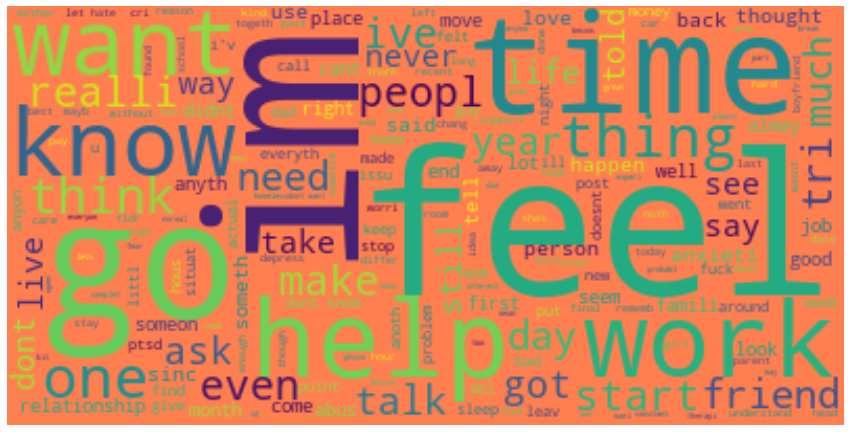

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='coral').generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Stress Detection Model

Change the Label

*The label column in our dataset contains labels as 0(no stress) and 1(stress). But, we will use Stress and No Stress labels instead of 1 nd 0 and select the text and label columns for the process of training a machine learning model.*

In [5]:
# Change the Label
data["label"] = data["label"].map({0:"No Stress", 1:"Stress"})
data = data[["text", "label"]]
print(data.head(10))

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress
5  think doesnt want put effort relationship work...     Stress
6  big compani luckili didnt see time act though ...  No Stress
7    clear okay monday think human brain work tri...     Stress
8  actual give assist half emerg fee come help so...     Stress
9  feel like street life fuck head there much don...     Stress


Split the Dataset

*Now, we will split the dataset into training and test sets...*

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

Fit the Model to Data

*Based on the problem this task is a binary classification problem. We will use Bernoulli Naive Bayes algorithm, which is one of the best classification algorithms.*

*Let's train the model...*

In [8]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB()
#model = MultinomialNB()
model.fit(xtrain, ytrain)

BernoulliNB()

Test the Model

*Now let's test the performance of our model on some random sentences based on...*

In [9]:
user_input = input("Enter your Feelings:")
data = cv.fit_transform([user_input]).toarray()
output = model.predict(data)
print(output)

ValueError: X has 4 features, but BernoulliNB is expecting 7842 features as input.